In [1]:
# -*- coding: utf-8 -*-
"""

"""
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # For pi constant and mathematical operations
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker





# Fendt 314

In [145]:
# Define the tractor model and work type
Tractor_Model = 'Fendt 314'

# Path to the tractor model folder
# model_folder_path = os.path.join('W:/projekt_2/ETraktor_Studenten/03_DataLogging/05_Dataset for publishing', Tractor_Model)
model_folder_path = os.path.join('W:\Downloads', Tractor_Model)


# Initialize an empty dataframe to hold all combined data
df_tracks = []
df_tracks_combined = pd.DataFrame()



# Construct the file path
file_path = os.path.join(model_folder_path, 'final_dataframe.csv')

df_tracks = pd.read_csv(file_path,)
# print(df_tracks.head())

# # Append the filtered dataframe from the current folder to the combined dataframe
df_tracks_combined = df_tracks

print(df_tracks_combined.columns)

C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\779632338.py:21: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracks = pd.read_csv(file_path,)


Index(['Time_(s)', 'index_[-]', 'EngSpeed_(RPM)', 'ActualEngPercentTorque_(%)',
       'DriversDemandEngPercentTorque_(%)', 'EngFuelRate_(L/h)',
       'EngReferenceTorque_[Nm]', 'Longitude_(°)', 'Latitude_(°)',
       'EngPercentLoadAtCurrentSpeed_(%)', 'AccelPedalPos1_(%)',
       'EngCoolantPress_(kPa)', 'EngOilPress_(kPa)',
       'EngFuelDeliveryPress_(kPa)', 'EngCoolantTemp_(°C)',
       'EngIntakeManifold1Temp_(°C)', 'EngIntakeManifold1Press_(kPa)',
       'FrontAxleSpeed_(km/h)', 'SpeedOverGround_(m/s)',
       'CourseOverGround_(°)', 'AmbientAirTemp_(°C)', 'Altitude_(m)',
       'DEFDoser1AbsPress_(kPa)', 'DEFActualDosingQuantity_(g/h)',
       'EngRequestedSpeed_SpeedLimit_(RPM)',
       'GroundBasedImplementDistance_[mm]', 'GroundBasedImplementSpeed_[mm/s]',
       'Volume_(%)', 'WheelBasedSpeed_(RPM)', 'WheelBasedVehicleSpeed _(km/h)',
       'EngChargeAirCooler1OutletTempEngFuelTemp1',
       'NominalFrictionPercentTorque', 'RearPTOOutputShaftSpeed_(RPM)',
       'Estimate

## F314: Violin on/offroad

C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1392833790.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1392833790.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1392833790.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1392833790.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

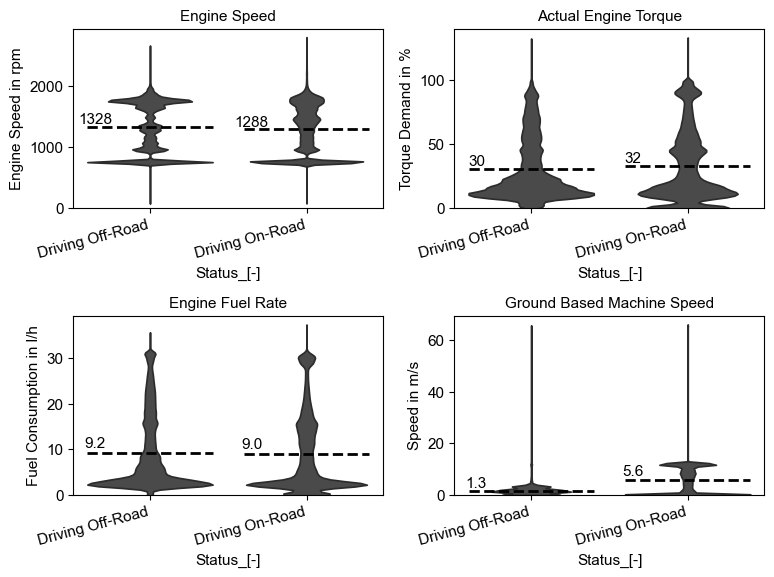

In [148]:

# Set the font properties globally using rcParams
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11  # Set font size for ticks, labels, etc.
plt.rcParams['axes.titlesize'] = 11  # Set title font size
plt.rcParams['axes.labelsize'] = 11  # Set label font size
plt.rcParams['xtick.labelsize'] = 11  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 11  # Y-axis tick label font size

# Create the violin plot for each variable
fig, axes = plt.subplots(2, 2, figsize=(20/2.54, 15/2.54))  # 2x2 grid for 4 plots

# Variable names for looping
variables = [
    ('EngSpeed_(RPM)', 'Engine Speed', 'Engine Speed in rpm'),
    ('ActualEngPercentTorque_(%)', 'Actual Engine Torque', 'Torque Demand in %'),
    ('EngFuelRate_(L/h)', 'Engine Fuel Rate', 'Fuel Consumption in l/h'),
    ('GroundBasedMachineSpeed_(m/s)', 'Ground Based Machine Speed', 'Speed in m/s')
]

# Decimal formatting based on variable
decimal_format = {
    'ActualEngPercentTorque_(%)': '{:.0f}',  # No decimals
    'EngSpeed_(RPM)': '{:.0f}',  # No decimals
    'EngFuelRate_(L/h)': '{:.1f}',  # 1 decimal
    'GroundBasedMachineSpeed_(m/s)': '{:.1f}'  # 1 decimal
}

# For each variable, calculate the mean for each status and create the violin plot
for i, (var, title, ylabel) in enumerate(variables):
    ax = axes[i // 2, i % 2]
    
    # Plot the violin in a lighter gray color
    sns.violinplot(x='Status_[-]', y=var, data=df_tracks_combined, ax=ax, color='#4a4a4a', inner=None)
    
    # Calculate the mean for each status
    means = df_tracks_combined.groupby('Status_[-]')[var].mean()

    # Add horizontal mean lines for each status
    for status, mean_value in means.items():
        if not pd.isna(mean_value):
            x_position = list(means.index).index(status)  # Find the x-coordinate
            ax.hlines(
                mean_value, x_position - 0.4, x_position + 0.4,  # Limit line range around x_position
                colors='black', linestyles='--', linewidth=2
            )
            # Annotate the mean value with formatting based on the variable
            mean_label = decimal_format[var].format(mean_value)
            ax.text(
                x_position-0.35, mean_value+0.5, mean_label, ha='center', va='bottom',
                fontsize=11,
                #bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2)
            )

    # Set plot titles and labels
    ax.set_title(title, fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_ylim(0, ax.get_ylim()[1])
    
    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


## F314: Violin for work types

['Seed drill combination']
Loading data from: W:\projekt_2\ETraktor_Studenten\Andrew_Working_Folder\MA\Dataset for Publishing\Fendt 314\Fertilizing
Loaded: Field_1.pkl
Loaded: Field_10.pkl
Loaded: Field_11.pkl
Loaded: Field_12.pkl
Loaded: Field_13.pkl
Loaded: Field_14.pkl
Loaded: Field_2.pkl
Loaded: Field_3.pkl
Loaded: Field_4.pkl
Loaded: Field_5.pkl
Loaded: Field_6.pkl
Loaded: Field_7.pkl
Loaded: Field_8.pkl
Loaded: Field_9.pkl
Loading data from: W:\projekt_2\ETraktor_Studenten\Andrew_Working_Folder\MA\Dataset for Publishing\Fendt 314\Seed drill combination
Loaded: Field_1.pkl
Loaded: Field_10.pkl
Loaded: Field_11.pkl
Loaded: Field_12.pkl
Loaded: Field_13.pkl
Loaded: Field_14.pkl
Loaded: Field_15.pkl
Loaded: Field_2.pkl
Loaded: Field_3.pkl
Loaded: Field_4.pkl
Loaded: Field_5.pkl
Loaded: Field_6.pkl
Loaded: Field_7.pkl
Loaded: Field_8.pkl
Loaded: Field_9.pkl
Loading data from: W:\projekt_2\ETraktor_Studenten\Andrew_Working_Folder\MA\Dataset for Publishing\Fendt 314\Disc harrowing
Loade

C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1819696808.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1819696808.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1819696808.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
C:\Users\ga42mus\AppData\Local\Temp\ipykernel_22180\1819696808.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


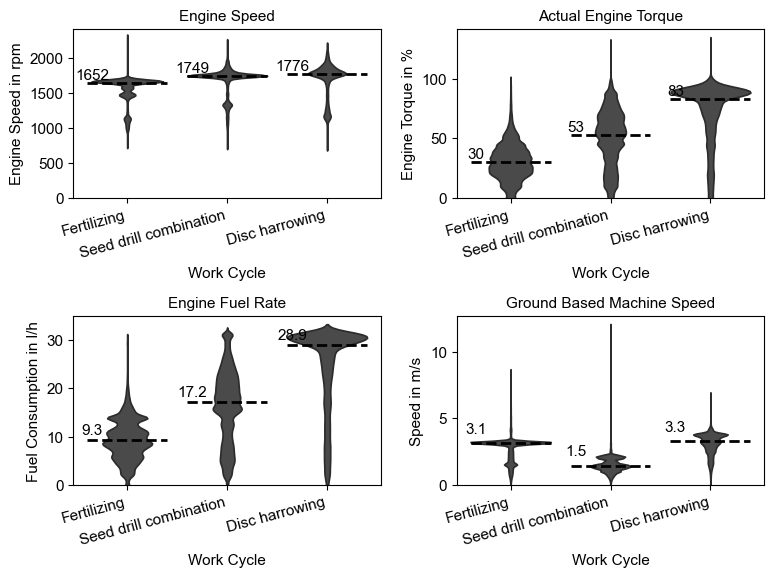

In [161]:


"""
[2] Work Type
"""


# Set the font properties globally using rcParams
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14  # Set font size for ticks, labels, etc.
plt.rcParams['axes.titlesize'] = 22  # Set title font size
plt.rcParams['axes.labelsize'] = 14  # Set label font size
plt.rcParams['xtick.labelsize'] = 14  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 14  # Y-axis tick label font size


# List of work types
# work_types = ['Disc harrowing', 'Fertilizing', 'Mowing (front)']
# work_types = ['Mowing (large-scale)', 'Seed drill combination', 'Spraying']
# work_types = ['Swathing', 'Transport']
work_types = ['Fertilizing','Seed drill combination','Disc harrowing']

# Initialize an empty list to store dataframes
all_dataframes = []
# Load data from each work type folder
for work_type in work_types:
    # Correctly append the Fields subfolder to the work type folder path
    work_type_folder = os.path.join(model_folder_path, work_type)  # Use 'Fields' as a string

    # Initialize an empty list to store dataframes for the current work type
    dataframes = []

    # Check if the folder exists
    if os.path.exists(work_type_folder):
        print(f"Loading data from: {work_type_folder}")
        # Loop through all .pkl files in the Fields folder
        for file_name in os.listdir(work_type_folder):
            if file_name.endswith('.pkl'):
                file_path = os.path.join(work_type_folder, file_name)
                
                # Load the dataframe and append it to the list
                try:
                    df_temp = pd.read_pickle(file_path)
                    # Add a new column 'Work Cycle' with the current work type
                    df_temp['Work Cycle'] = work_type
                    dataframes.append(df_temp)
                    print(f"Loaded: {file_name}")
                except Exception as e:
                    print(f"Error loading {file_name}: {e}")

    # Concatenate dataframes into the list for all work types
    if dataframes:
        all_dataframes.append(pd.concat(dataframes, ignore_index=True))
    else:
        print(f"No dataframes found in {work_type_folder}.")

# Concatenate all work type dataframes into a single dataframe
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Now we have combined_df with all the data and the 'Work Cycle' column
# ################
# in case Transport is included
if 'Transport' in work_types:
    # this step is necessary because the columns are named different in the transport cycle
    # Specify the 'Transport' work type folder
    work_type = 'Transport'
    
    # Initialize an empty dataframe for transport data
    df_transport = pd.DataFrame()
    
    # Construct the file path for the "Transport" work type
    work_type_folder = os.path.join(model_folder_path, work_type)
    
    # Check if the folder exists
    if os.path.exists(work_type_folder):
        print(f"Loading data from: {work_type_folder}")
        
        # Loop through all .pkl files in the Transport folder
        for file_name in os.listdir(work_type_folder):
            if file_name.endswith('.pkl'):
                file_path = os.path.join(work_type_folder, file_name)
                
                # Load the dataframe
                try:
                    df_temp = pd.read_pickle(file_path)
                    
                    # Rename columns to match the required format
                    df_temp = df_temp.rename(columns={
                        'EngSpeed': 'EngSpeed_(RPM)',
                        'ActualEngPercentTorque': 'ActualEngPercentTorque_(%)',
                        'EngFuelRate': 'EngFuelRate_(L/h)',
                        'GroundBasedMachineSpeed': 'GroundBasedMachineSpeed_(m/s)'
                        # 'FrontAxleSpeed': 'FrontAxleSpeed_(km/h)'
                    })
                    
                    # Add a new column for the work cycle
                    df_temp['Work Cycle'] = work_type
                    
                    # Append the transport data to the main dataframe
                    df_transport = pd.concat([df_transport, df_temp], ignore_index=True)
                    print(f"Loaded: {file_name}")
                except Exception as e:
                    print(f"Error loading {file_name}: {e}")
    
    else:
        print(f"Folder {work_type_folder} not found.")
    
    # Now, combine 'df_transport' with 'combined_df'
    combined_df = pd.concat([combined_df, df_transport], ignore_index=True)

# ################

# Set the font properties globally using rcParams
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11  # Set font size for ticks, labels, etc.
plt.rcParams['axes.titlesize'] = 11  # Set title font size
plt.rcParams['axes.labelsize'] = 11  # Set label font size
plt.rcParams['xtick.labelsize'] = 11  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 11  # Y-axis tick label font size


# # Create the violin plot for each variable
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for 4 plots

# Variable names for looping
variables = [
    ('EngSpeed_(RPM)', 'Engine Speed', 'Engine Speed in rpm'),
    ('ActualEngPercentTorque_(%)', 'Actual Engine Torque', 'Engine Torque in %'),
    ('EngFuelRate_(L/h)', 'Engine Fuel Rate', 'Fuel Consumption in l/h'),
    ('GroundBasedMachineSpeed_(m/s)', 'Ground Based Machine Speed', 'Speed in m/s'),
    # ('FrontAxleSpeed_(km/h)', 'Front Axle Speed', 'Speed in km/h')
]

# Decimal formatting based on variable
decimal_format = {
    'ActualEngPercentTorque_(%)': '{:.0f}',  # No decimals
    'EngSpeed_(RPM)': '{:.0f}',  # No decimals
    'EngFuelRate_(L/h)': '{:.1f}',  # 1 decimal
    'GroundBasedMachineSpeed_(m/s)': '{:.1f}',  # 1 decimal
    # 'FrontAxleSpeed_(km/h)': '{:.1f}'
}

# Create the violin plot for each variable
fig, axes = plt.subplots(2, 2, figsize=(20/2.54, 15/2.54))  # 2x2 grid for 4 plots
# work_cycle_colors = {
#     'Cultivating (deep)': 'black',
#     'Cultivating (shallow)': 'black',
#     'Disc harrowing': 'black'
# }

# Define the desired order for the work cycles
work_cycle_order = work_types

# For each variable, calculate the mean for each work cycle and create the violin plot
for i, (var, title, ylabel) in enumerate(variables):
    ax = axes[i // 2, i % 2]
    
    # Plot the violin in a lighter gray color
    sns.violinplot(x='Work Cycle', y=var, data=combined_df, ax=ax, color='#4a4a4a', inner=None)
    
    # Calculate the mean for each work cycle
    medians = combined_df.groupby('Work Cycle')[var].median()
    

    # Add horizontal mean lines for each work state (only across their corresponding x-range)
    for work_state, median_value in medians.items():
        if not pd.isna(median_value):
            x_position = work_cycle_order.index(work_state)  # Ensure the x-coordinate aligns with the correct order
            ax.hlines(
                median_value, x_position - 0.4, x_position + 0.4,  # Limit line range around x_position
                colors='black', linestyles='--', linewidth=2
            )
            # Annotate the mean value with formatting based on the variable
            median_label = decimal_format[var].format(median_value)
            ax.text(
                x_position-0.35, median_value+0.5, median_label, 
                color='black', ha='center', va='bottom',
                fontsize=11,
                #bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2)  # Adding a box around the number
            )

    # Set plot titles and labels
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, ax.get_ylim()[1])
    

    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
    


# Adjust layout for better display

plt.tight_layout()

# Show the plot
plt.show()

## F314: lat/lon for field

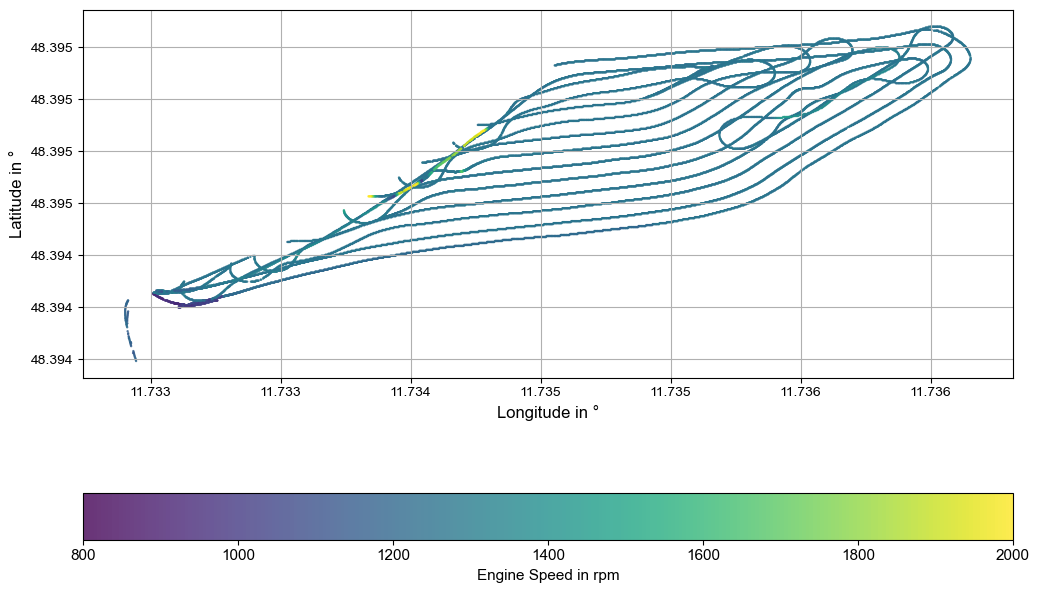

Median Engine Speed: 1265.5557250976562 RPM


In [190]:
file_path = os.path.join(model_folder_path,'Swathing', 'Field_2.pkl')



Field_df = pd.read_pickle(file_path)


# Group by unique combinations of 'Date' and 'Cluster'
unique_fields = Field_df.groupby(['Cluster_[-]'])


# Plot each unique field
for (cluster), group in unique_fields:
    plt.figure(figsize=(12, 10))
# Scatter plot with EngSpeed as the color
    
    scatter = plt.scatter(group['Longitude_(°)'], group['Latitude_(°)'], c=group['EngSpeed_(RPM)'], cmap='viridis', s=0.5, alpha=0.8, vmax=2000, vmin = 800)
    
    
    # Add a color bar
    cbar = plt.colorbar(scatter,orientation='horizontal')
    cbar.set_label('Engine Speed in rpm', fontsize=11, fontname='Arial')
    cbar.ax.tick_params(labelsize=11)  # Set color bar tick labels to Arial and fontsize 14
    
    # Title and labels for the plot
    #plt.title('Sowing Engine Speed', fontsize=22, fontname='Arial', pad=30)
    plt.xlabel('Longitude in °', fontsize=12, fontname='Arial')
    plt.ylabel('Latitude in °', fontsize=12, fontname='Arial')

    # Format the ticks to show 3 decimal places
    formatter = ticker.FuncFormatter(lambda x, _: f'{x:.3f}')

    # Apply the formatter to both x and y ticks
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.gca().set_aspect('equal',adjustable='box')
    
    plt.xticks(fontsize=10, fontname='Arial')
    plt.yticks(fontsize=10, fontname='Arial')
    plt.grid(True)
    #------------

    
    
    plt.show()  # You can use plt.savefig() if you want to save the plot as a file



    # statistic vaLUES 
    # avg engine speed for the field
    median_engine_speed = Field_df['EngSpeed_(RPM)'].median()
    print(f'Median Engine Speed: {median_engine_speed} RPM')


    

  

## F314: lat/lon for transport

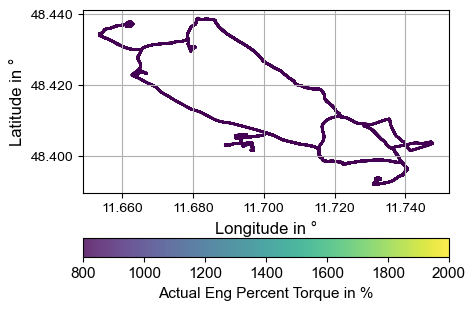

Median Act Eng Percent Torque: 25.0 %


In [192]:
# Path to the tractor model folder
file_path = os.path.join(model_folder_path,'Transport', 'Field_1.pkl')


Field_df = pd.read_pickle(file_path)


# Scatter plot with all data points (no grouping)
plt.figure(figsize=(12/2.54, 10/2.54))

# Plot all data points in one scatter plot
scatter = plt.scatter(Field_df['Longitude'], Field_df['Latitude'], 
                      c=Field_df['ActualEngPercentTorque'], cmap='viridis', s=0.5, alpha=0.8, vmax=2000, vmin=800)

# Add a color bar
cbar = plt.colorbar(scatter, orientation='horizontal')
cbar.set_label('Actual Eng Percent Torque in %', fontsize=11, fontname='Arial')
cbar.ax.tick_params(labelsize=11)  # Set color bar tick labels to Arial and fontsize 14

# Title and labels for the plot
plt.xlabel('Longitude in °', fontsize=12, fontname='Arial')
plt.ylabel('Latitude in °', fontsize=12, fontname='Arial')

# Format the ticks to show 3 decimal places
formatter = ticker.FuncFormatter(lambda x, _: f'{x:.3f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=10, fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')
plt.grid(True)

# Show the plot
plt.show()

# Optional: Calculate median engine speed for the entire dataset
median_torque = Field_df['ActualEngPercentTorque'].median()
print(f'Median Act Eng Percent Torque: {median_torque} %')